<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#预测数值型数据：回归" data-toc-modified-id="预测数值型数据：回归-1">预测数值型数据：回归</a></span><ul class="toc-item"><li><span><a href="#用线性回归找到最佳拟合曲线" data-toc-modified-id="用线性回归找到最佳拟合曲线-1.1">用线性回归找到最佳拟合曲线</a></span></li><li><span><a href="#回归的一般方法" data-toc-modified-id="回归的一般方法-1.2">回归的一般方法</a></span></li><li><span><a href="#线性回归" data-toc-modified-id="线性回归-1.3">线性回归</a></span></li><li><span><a href="#代码实现与注释" data-toc-modified-id="代码实现与注释-1.4">代码实现与注释</a></span><ul class="toc-item"><li><span><a href="#1.-计算最佳拟合曲线" data-toc-modified-id="1.-计算最佳拟合曲线-1.4.1">1. 计算最佳拟合曲线</a></span></li></ul></li><li><span><a href="#局部加权线性回归（LWLR）" data-toc-modified-id="局部加权线性回归（LWLR）-1.5">局部加权线性回归（LWLR）</a></span><ul class="toc-item"><li><span><a href="#局部加权线性回归函数" data-toc-modified-id="局部加权线性回归函数-1.5.1">局部加权线性回归函数</a></span></li><li><span><a href="#局部加权线性回归-注意事项" data-toc-modified-id="局部加权线性回归-注意事项-1.5.2">局部加权线性回归 注意事项</a></span></li></ul></li><li><span><a href="#线性回归-&amp;-局部加权线性回归-项目案例" data-toc-modified-id="线性回归-&amp;-局部加权线性回归-项目案例-1.6">线性回归 &amp; 局部加权线性回归 项目案例</a></span><ul class="toc-item"><li><span><a href="#项目概述" data-toc-modified-id="项目概述-1.6.1">项目概述</a></span></li></ul></li><li><span><a href="#缩减系数来-“理解”-数据" data-toc-modified-id="缩减系数来-“理解”-数据-1.7">缩减系数来 “理解” 数据</a></span></li><li><span><a href="#岭回归" data-toc-modified-id="岭回归-1.8">岭回归</a></span><ul class="toc-item"><li><span><a href="#岭回归代码" data-toc-modified-id="岭回归代码-1.8.1">岭回归代码</a></span></li></ul></li><li><span><a href="#lasso" data-toc-modified-id="lasso-1.9">lasso</a></span></li><li><span><a href="#前向逐步回归" data-toc-modified-id="前向逐步回归-1.10">前向逐步回归</a></span><ul class="toc-item"><li><span><a href="#代码" data-toc-modified-id="代码-1.10.1">代码</a></span></li><li><span><a href="#小结" data-toc-modified-id="小结-1.10.2">小结</a></span></li></ul></li><li><span><a href="#权衡偏差和方差" data-toc-modified-id="权衡偏差和方差-1.11">权衡偏差和方差</a></span><ul class="toc-item"><li><span><a href="#项目案例1:-预测乐高玩具套装的价格" data-toc-modified-id="项目案例1:-预测乐高玩具套装的价格-1.11.1">项目案例1: 预测乐高玩具套装的价格</a></span></li></ul></li></ul></li></ul></div>

# 预测数值型数据：回归
**摘要**

1.线性回归

2.局部加权线性回归

3.岭回归和逐步线性回归

4.预测鲍鱼年龄和玩具售价代码实现和注释



## 用线性回归找到最佳拟合曲线

**线性回归**
> 优点：结果易于理解，计算上不复杂。  
缺点：对非线性的数据拟合不好。    
适用于数据类型：数值型和标称型数据。   


**回归没特别说明的话等同于线性回归**

## 回归的一般方法
>收集数据: 采用任意方法收集数据   
准备数据: 回归需要数值型数据，标称型数据将被转换成二值型数据   
分析数据: 绘出数据的可视化二维图将有助于对数据做出理解和分析，在采用缩减法求得新回归系数之后，可以将新拟合线绘在图上作为对比   
训练算法: 找到回归系数    
测试算法: 使用 R^2 或者预测值和数据的拟合度，来分析模型的效果   
使用算法: 使用回归，可以在给定输入的时候预测出一个数值，这是对分类方法的提升，因为这样可以预测连续型数据而不仅仅是离散的类别标签  


## 线性回归  

我们给定数据集 $D=\left\{ (x_1,y_1),(x_2,y_2),...(x_m,y_m) \right\} $，其中$ x_i=(x_{i1},x_{i2},...x_{id}) $，$ y_i\in R$ .

线性回归就是想学得一个线性模型来尽可能地预测真实值，即：
$$
f(x)=w_1x_1+w_2x_2+...+w_dx_d+d
$$
写成向量的形式就是：
$$
f(x)=w^Tx+b
$$
其中 $w=(w_1;w_2;w_3...w_d)$ ，当我们求得$w$和$d$之后，模型也就确定了。

我们如何确定$w$和$b$呢？我们需要给定一个目标函数。一般情况下我们采用均方误差最小化，即：
$$
(w^*,b^*)=argmin\sum_{i=1}^{m}{(f(x_i)-y_i)^2}
$$
为了便于讨论，我们把w和x写成如下形式：
$$
\begin{array}{aligh}
\tilde{w}=(w;b)\\
x_i=(x_{i1},x_{i2},...x_{id},1)
\end{array}
$$
这样，线性回归模型就可以写为：
$$
f(x)=\tilde{w}^T\cdot x
$$
那上面均方误差最小化写成向量的形式就等价于：
$$
\tilde{w}=argmin(y-X\tilde{w})^T(y-X\tilde{w})
$$
其中，$X$为：
$$
X=\left( \begin{array}{ccc} x_{11} & x_{12} & ...&x_{1d}&1 \\ x_{21} & x_{22} & ...&x_{2d}&1 \\ ... & ... & ...&...&... \\ x_{m1} & x_{m2} & ...&x_{md}&1 \end{array} \right)
$$
令 $E_\tilde{w}=(y-X\tilde{w})^T(y-X\tilde{w})$ ，我们令其对 $\tilde{w}$ 求导：
$$
\frac{dE_{\tilde{w}}}{d\tilde{w}}=\frac{d(y-X\tilde{w})^T(y-X\tilde{w})}{d\tilde{w}}=2X^T(X\tilde{w}-y)
$$
这个矩阵求导结果怎么得到的呢？很多地方都只是给了结果。

推导这一部分得有一些线性代数的知识，关于机器学习数学方面的内容，后面有时间的话我会系统梳理。这里先给大家简单推导一遍，想要详细了解的同学可以看这篇文章，写得很好：https://zhuanlan.zhihu.com/p/24709748

我假设大家已经看了上面的文章，了解了具体的公式。

由 $d(XY)=dXY+XdY$ ，得到  
$
=\cfrac{d(y-X\tilde{w})^T(y-X\tilde{w})}{d\tilde{w}}
$

$
=(Xd\tilde{w})^T(y-X\tilde{w})+(y-X\tilde{w})^T(Xd\tilde{w})
$

再由 $df=tr(\cfrac{\alpha f}{\alpha X}^TdX)$ ，得到   

$
=tr((Xd\tilde{w})^T(y-X\tilde{w})+(y-X\tilde{w})^T(Xd\tilde{w}))
$    

再由 $tr(A\pm B)=tr(A)\pm tr(B)$ ，得到   

$
=tr((Xd\tilde{w})^T(y-X\tilde{w}))+tr((y-X\tilde{w})^T(Xd\tilde{w}))
$

因为 $tr(A^T)=tr(A)$ ，所以

$
=tr(Xd\tilde{w}(y-X\tilde{w})^T)+tr((y-X\tilde{w})^T(Xd\tilde{w}))
$

又因为 $tr(AB)=tr(BA)$ ，所以

$
=tr((y-X\tilde{w})^TXd\tilde{w})+tr((y-X\tilde{w})^T(Xd\tilde{w}))
$

$
=tr(2(y-X\tilde{w})^TXd\tilde{w})
$

$
=tr(\cfrac{\alpha f}{\alpha \tilde{w}}^Td\tilde{w})
$

所以得到：   
$
\cfrac{\alpha f}{\alpha \tilde{w}}=2X^T(y-X\tilde{w})
$

令上式等于零，得到 $\tilde{w}$ 最优解的闭式解：
$$
\tilde{w}^*=(X^T X)^{-1}X^Ty
$$
当然上式成立的前提条件是 $X^T X$ 可逆。在得到 $\tilde{w}^*$ 之后，我们也就可以写出线性回归模型：
$$
f(x)=(\tilde{w}^*)^Tx
$$
以上就是线性回归模型的基本形式。

## 代码实现与注释

### 1. 计算最佳拟合曲线

根据下图中的点，找出该数据的最佳拟合曲线
![](./image/第8章回归/1.jpg)


数据格式为：
```
x0          x1          y 
1.000000	0.067732	3.176513
1.000000	0.427810	3.816464
1.000000	0.995731	4.550095
1.000000	0.738336	4.256571
```

In [29]:
from numpy import *
# 加载函数，并得到特征矩阵和类别矩阵
def loadDataSet(fileName):
    """ 加载数据
        解析以tab键分隔的文件中的浮点数
    Returns：
        dataMat ：  feature 对应的数据集
        labelMat ： feature 对应的分类标签，即类别标签

    """
    # 获取样本特征的总数，不算最后的目标变量 
    numFeat=len(open(fileName).readline().split('\t'))-1
    dataMat=[];labelMat=[]
    fr=open(fileName)
    for line in fr.readlines():
        # 读取每一行
        lineArr=[]
        # 删除一行中以tab分隔的数据前后的空白符号
        curLine=line.strip().split('\t')
        # i 从0到2，不包括2 
        for i in range(numFeat):
            # 将数据添加到lineArr List中，每一行数据测试数据组成一个行向量           
            lineArr.append(float(curLine[i]))
            # 将测试数据的输入数据部分存储到dataMat 的List中
        dataMat.append(lineArr)
        # 将每一行的最后一个数据，即类别，或者叫目标变量存储到labelMat List中
        labelMat.append(float(curLine[-1]))
    return dataMat,labelMat

# 计算最佳拟合曲线
def standRegress(xArr,yArr):
    '''
    Description：
        线性回归
    Args:
        xArr ：输入的样本数据，包含每个样本数据的 feature
        yArr ：对应于输入数据的类别标签，也就是每个样本对应的目标变量
    Returns:
        ws：回归系数
    '''

    # mat()函数将xArr，yArr转换为矩阵 mat().T 代表的是对矩阵进行转置操作
    xMat=mat(xArr)
    yMat=mat(yArr).T
    # 矩阵乘法的条件是左矩阵的列数等于右矩阵的行数
    xTx=xMat.T*xMat
    # 因为要用到xTx的逆矩阵，所以事先需要确定计算得到的xTx是否可逆，条件是矩阵的行列式不为0
    # linalg.det() 函数是用来求得矩阵的行列式的，如果矩阵的行列式为0，则这个矩阵是不可逆的，就无法进行接下来的运算                   
    # 如果行列式等于零，则矩阵不可逆，直接返回
    if(linalg.det(xTx)==0.0):
        print("This matrix is singular,cannot do inverse")
        return
    # 最小二乘法
    # 利用公式计算回归系数
    ws=xTx.I*(xMat.T*yMat)
    return ws

In [3]:
xArr,yArr=loadDataSet("./input&code/Ch08/ex0.txt")
xArr,yArr

([[1.0, 0.067732],
  [1.0, 0.42781],
  [1.0, 0.995731],
  [1.0, 0.738336],
  [1.0, 0.981083],
  [1.0, 0.526171],
  [1.0, 0.378887],
  [1.0, 0.033859],
  [1.0, 0.132791],
  [1.0, 0.138306],
  [1.0, 0.247809],
  [1.0, 0.64827],
  [1.0, 0.731209],
  [1.0, 0.236833],
  [1.0, 0.969788],
  [1.0, 0.607492],
  [1.0, 0.358622],
  [1.0, 0.147846],
  [1.0, 0.63782],
  [1.0, 0.230372],
  [1.0, 0.070237],
  [1.0, 0.067154],
  [1.0, 0.925577],
  [1.0, 0.717733],
  [1.0, 0.015371],
  [1.0, 0.33507],
  [1.0, 0.040486],
  [1.0, 0.212575],
  [1.0, 0.617218],
  [1.0, 0.541196],
  [1.0, 0.045353],
  [1.0, 0.126762],
  [1.0, 0.556486],
  [1.0, 0.901144],
  [1.0, 0.958476],
  [1.0, 0.274561],
  [1.0, 0.394396],
  [1.0, 0.87248],
  [1.0, 0.409932],
  [1.0, 0.908969],
  [1.0, 0.166819],
  [1.0, 0.665016],
  [1.0, 0.263727],
  [1.0, 0.231214],
  [1.0, 0.552928],
  [1.0, 0.047744],
  [1.0, 0.365746],
  [1.0, 0.495002],
  [1.0, 0.493466],
  [1.0, 0.792101],
  [1.0, 0.76966],
  [1.0, 0.251821],
  [1.0, 0.181951],

In [4]:
ws=standRegress(xArr,yArr)
ws

matrix([[3.00774324],
        [1.69532264]])

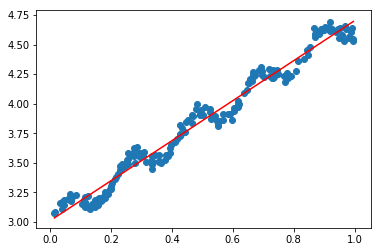

In [12]:
xMat=mat(xArr)
yMat=mat(yArr)
yHat=xMat*ws

import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(xMat[:,1].flatten().A[0],yMat.T[:,0].flatten().A[0])
xCopy = xMat.copy()
xCopy.sort(0)
yHat = xCopy *ws
ax.plot(xCopy[:,1],yHat,'red') 
plt.show()

In [15]:
yHat=xMat*ws
print (corrcoef(yHat.T, yMat))#计算相关性

[[1.         0.98647356]
 [0.98647356 1.        ]]


## 局部加权线性回归（LWLR）

　　局部加权线性回归的原理很简单：当出现一个新的样本需要预测，我在训练回归系数 $w$ 时，并不是给所有训练样本同样的权重，而是距离新样本近的训练样本权重大，距离新样本远的训练样本权重小，这样可以对新样本进行更准确的预测。因为我们更看重训练样本局部的趋势。

算法解出回归系数的公式如下：
$$
w=(X^TWX)X^TWy
$$
这里的$W$就是每个训练样本的权重。
线性回归的一个问题是有可能出现欠拟合现象，因为它求的是具有最小均方差的无偏估计。显而易见，如果模型欠拟合将不能取得最好的预测效果。所以有些方法允许在估计中引入一些偏差，从而降低预测的均方误差。

一个方法是局部加权线性回归（Locally Weighted Linear Regression，LWLR）。在这个算法中，我们给预测点附近的每个点赋予一定的权重，然后与 线性回归 类似，在这个子集上基于最小均方误差来进行普通的回归。我们需要最小化的目标函数大致为:
$$
\sum_i w(y^{(i)} - \hat y ^{(i)})^2
$$

与 kNN 一样，这种算法每次预测均需要事先选取出对应的数据子集。该算法解出回归系数 $w$ 的形式如下:

$$
w(i,i)=exp\left ( \cfrac {\mid x^{(i)}-x \mid}{-2k^2}\right )
$$


这样就构建了一个只含对角元素的权重矩阵$ w$，并且点 $x$ 与$ x(i)$ 越近，$w(i, i)$ 将会越大。上述公式中包含一个需要用户指定的参数 k，它决定了对附近的点赋予多大的权重，这也是使用 LWLR 时唯一需要考虑的参数，下面的图给出了参数 $k$ 与权重的关系。

![](./image/第8章回归/2.jpg)

上面的图是 每个点的权重图（假定我们正预测的点是 x = 0.5），最上面的图是原始数据集，第二个图显示了当 k = 0.5 时，大部分的数据都用于训练回归模型；而最下面的图显示当 k=0.01 时，仅有很少的局部点被用于训练回归模型。

### 局部加权线性回归函数



In [19]:
# 局部加权线性回归
def lwlr(testPoint,xArr,yArr,k=1.0):
    '''
        Description：
            局部加权线性回归，在待预测点附近的每个点赋予一定的权重，在子集上基于最小均方差来进行普通的回归。
        Args：
            testPoint：样本点
            xArr：样本的特征数据，即 feature
            yArr：每个样本对应的类别标签，即目标变量
            k:关于赋予权重矩阵的核的一个参数，与权重的衰减速率有关
        Returns:
            testPoint * ws：数据点与具有权重的系数相乘得到的预测点
        Notes:
            这其中会用到计算权重的公式，w = e^((x^((i))-x) / -2k^2)
            理解：x为某个预测点，x^((i))为样本点，样本点距离预测点越近，贡献的误差越大（权值越大），越远则贡献的误差越小（权值越小）。
            关于预测点的选取，在我的代码中取的是样本点。其中k是带宽参数，控制w（钟形函数）的宽窄程度，类似于高斯函数的标准差。
            算法思路：假设预测点取样本点中的第i个样本点（共m个样本点），遍历1到m个样本点（含第i个），算出每一个样本点与预测点的距离，
            也就可以计算出每个样本贡献误差的权值，可以看出w是一个有m个元素的向量（写成对角阵形式）。
    '''
    # mat() 函数是将array转换为矩阵的函数， mat().T 是转换为矩阵之后，再进行转置操作
    xMat = mat(xArr)
    yMat = mat(yArr).T
    # 获得xMat矩阵的行数
    m = shape(xMat)[0]
    # eye()返回一个对角线元素为1，其他元素为0的二维数组，创建权重矩阵weights，该矩阵为每个样本点初始化了一个权重                   
    weights = mat(eye((m)))
    for j in range(m):
        # testPoint 的形式是 一个行向量的形式
        # 计算 testPoint 与输入样本点之间的距离，然后下面计算出每个样本贡献误差的权值
        diffMat = testPoint - xMat[j,:]
        # k控制衰减的速度
        weights[j,j] = exp(diffMat*diffMat.T/(-2.0*k**2))
    # 根据矩阵乘法计算 xTx ，其中的 weights 矩阵是样本点对应的权重矩阵
    xTx = xMat.T * (weights * xMat)
    if linalg.det(xTx) == 0.0:
        print ("This matrix is singular, cannot do inverse")
        return
    # 计算出回归系数的一个估计
    ws = xTx.I * (xMat.T * (weights * yMat))
    return testPoint * ws

def lwlrTest(testArr,xArr,yArr,k=1.0):
    '''
        Description：
            测试局部加权线性回归，对数据集中每个点调用 lwlr() 函数
        Args：
            testArr：测试所用的所有样本点
            xArr：样本的特征数据，即 feature
            yArr：每个样本对应的类别标签，即目标变量
            k：控制核函数的衰减速率
        Returns：
            yHat：预测点的估计值
    '''
    # 得到样本点的总数
    m = shape(testArr)[0]
    # 构建一个全部都是 0 的 1 * m 的矩阵
    yHat = zeros(m)
    # 循环所有的数据点，并将lwlr运用于所有的数据点 
    for i in range(m):
        yHat[i] = lwlr(testArr[i],xArr,yArr,k)
    # 返回估计值
    return yHat

def lwlrTestPlot(xArr,yArr,k=1.0):  
    '''
        Description:
            首先将 X 排序，其余的都与lwlrTest相同，这样更容易绘图
        Args：
            xArr：样本的特征数据，即 feature
            yArr：每个样本对应的类别标签，即目标变量，实际值
            k：控制核函数的衰减速率的有关参数，这里设定的是常量值 1
        Return：
            yHat：样本点的估计值
            xCopy：xArr的复制
    '''
    # 生成一个与目标变量数目相同的 0 向量
    yHat = zeros(shape(yArr))
    # 将 xArr 转换为 矩阵形式
    xCopy = mat(xArr)
    # 排序
    xCopy.sort(0)
    # 开始循环，为每个样本点进行局部加权线性回归，得到最终的目标变量估计值
    for i in range(shape(xArr)[0]):
        yHat[i] = lwlr(xCopy[i],xArr,yArr,k)
    return yHat,xCopy


#test for LWLR
def regression2():
    xArr, yArr = loadDataSet("./input&code/Ch08/ex0.txt")
    yHat = lwlrTest(xArr, xArr, yArr, 0.003)
    xMat = mat(xArr)
    srtInd = xMat[:,1].argsort(0)           #argsort()函数是将x中的元素从小到大排列，提取其对应的index(索引)，然后输出
    xSort=xMat[srtInd][:,0,:]
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(xSort[:,1], yHat[srtInd])
    ax.scatter(xMat[:,1].flatten().A[0], mat(yArr).T.flatten().A[0] , s=2, c='red')
    plt.show()

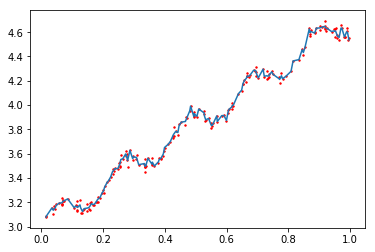

In [20]:
regression2()

![](./image/第8章回归/3.jpg)

上图使用了 3 种不同平滑值绘出的局部加权线性回归的结果。上图中的平滑系数 k =1.0，中图 k = 0.01，下图 k = 0.003 。可以看到，k = 1.0 时的模型效果与最小二乘法差不多，k=0.01时该模型可以挖出数据的潜在规律，而 k=0.003时则考虑了太多的噪声，进而导致了过拟合现象。

### 局部加权线性回归 注意事项
局部加权线性回归也存在一个问题，即增加了计算量，因为它对每个点做预测时都必须使用整个数据集。

## 线性回归 & 局部加权线性回归 项目案例

到此为止，我们已经介绍了找出最佳拟合直线的两种方法，下面我们用这些技术来预测鲍鱼的年龄。

### 项目概述
我们有一份来自 UCI 的数据集合的数据，记录了鲍鱼（一种介壳类水生动物）的年龄。鲍鱼年龄可以从鲍鱼壳的层数推算得到。


数据存储格式：
```
1	0.455	0.365	0.095	0.514	0.2245	0.101	0.15	15
1	0.35	0.265	0.09	0.2255	0.0995	0.0485	0.07	7
-1	0.53	0.42	0.135	0.677	0.2565	0.1415	0.21	9
1	0.44	0.365	0.125	0.516	0.2155	0.114	0.155	10
0	0.33	0.255	0.08	0.205	0.0895	0.0395	0.055	7
```

使用上面我们讲到的 局部加权线性回归 训练算法，求出回归系数

>测试算法: 使用 rssError()函数 计算预测误差的大小，来分析模型的效果

In [30]:
def rssError(yArr,yHatArr):
    return ((yArr-yHatArr)**2).sum()

# test for abloneDataSet
def abaloneTest():
    '''
    Desc:
        预测鲍鱼的年龄
    Args:
        None
    Returns:
        None
    '''
    # 加载数据
    abX, abY = loadDataSet("./input&code/Ch08/abalone.txt")
    # 使用不同的核进行预测
    oldyHat01 = lwlrTest(abX[0:99], abX[0:99], abY[0:99], 0.1)
    oldyHat1 = lwlrTest(abX[0:99], abX[0:99], abY[0:99], 1)
    oldyHat10 = lwlrTest(abX[0:99], abX[0:99], abY[0:99], 10)   
    # 打印出不同的核预测值与训练数据集上的真实值之间的误差大小
    print("old yHat01 error Size is :" , rssError(abY[0:99], oldyHat01.T))
    print("old yHat1 error Size is :" , rssError(abY[0:99], oldyHat1.T))
    print("old yHat10 error Size is :" , rssError(abY[0:99], oldyHat10.T))

    # 打印出 不同的核预测值 与 新数据集（测试数据集）上的真实值之间的误差大小
    newyHat01 = lwlrTest(abX[100:199], abX[0:99], abY[0:99], 0.1)
    print ("new yHat01 error Size is :" , rssError(abY[0:99], newyHat01.T))
    newyHat1 = lwlrTest(abX[100:199], abX[0:99], abY[0:99], 1)
    print ("new yHat1 error Size is :" , rssError(abY[0:99], newyHat1.T))
    newyHat10 = lwlrTest(abX[100:199], abX[0:99], abY[0:99], 10)
    print ("new yHat10 error Size is :" , rssError(abY[0:99], newyHat10.T))

    # 使用简单的 线性回归 进行预测，与上面的计算进行比较
    standWs = standRegress(abX[0:99], abY[0:99])
    standyHat = mat(abX[100:199]) * standWs
    print("standRegress error Size is:", rssError(abY[100:199], standyHat.T.A))

In [31]:
abaloneTest()

old yHat01 error Size is : 56.78868743050092
old yHat1 error Size is : 429.89056187038
old yHat10 error Size is : 549.1181708827924
new yHat01 error Size is : 62452.59620515083
new yHat1 error Size is : 3207.689628823445
new yHat10 error Size is : 3320.08921090694
standRegress error Size is: 518.6363153245542


简单线性回归达到了与局部加权现行回归类似的效果。这也说明了一点，必须在未知数据上比较效果才能选取到最佳模型。那么最佳的核大小是 10 吗？或许是，但如果想得到更好的效果，应该用 10 个不同的样本集做 10 次测试来比较结果。

## 缩减系数来 “理解” 数据

如果数据的特征比样本点还多应该怎么办？是否还可以使用线性回归和之前的方法来做预测？答案是否定的，即我们不能再使用前面介绍的方法。这是因为在计算$(x^T x)^{-1}$的时候会出错。

如果特征比样本点还多(n > m)，也就是说输入数据的矩阵$ x$ 不是满秩矩阵。非满秩矩阵求逆时会出现问题。

为了解决这个问题，我们引入了 岭回归（ridge regression） 这种缩减方法。接着是 lasso法，最后介绍 前向逐步回归。

## 岭回归

简单来说，岭回归就是在矩阵$x^T x$上加一个 $\lambda I$ 从而使得矩阵非奇异，进而能对$x^T x+\lambda I$求逆。其中矩阵I是一个$ m * m$ 的单位矩阵， 对角线上元素全为1，其他元素全为0。而λ是一个用户定义的数值，后面会做介绍。在这种情况下，回归系数的计算公式将变成：
$$
\hat w=(X^T X+\lambda I)^{-1}X^T y
$$

岭回归最先用来处理特征数多于样本数的情况，现在也用于在估计中加入偏差，从而得到更好的估计。这里通过引入 $\lambda$ 来限制了所有$w$ 之和，通过引入该惩罚项，能够减少不重要的参数，这个技术在统计学中也叫作 缩减(shrinkage)。

* 岭回归的岭是什么
>岭回归使用了单位矩阵乘以产量$\lambda$。我们观察其中单位矩阵$I$，可以看到I贯穿整个对角线，其余元素全是0，形象地，在0构成的平面上有一条I组成的“岭”。

![](./image/第8章回归/4.jpg)

缩减方法可以去掉不重要的参数，因此能更好地理解数据。此外，与简单的线性回归相比，缩减法能取得更好的预测效果。

这里通过预测误差最小化得到 λ: 数据获取之后，首先抽一部分数据用于测试，剩余的作为训练集用于训练参数 w。训练完毕后在测试集上测试预测性能。通过选取不同的 λ 来重复上述测试过程，最终得到一个使预测误差最小的 λ 。

### 岭回归代码


In [84]:
def ridgeRegres(xMat,yMat,lam=0.2):
    '''
        Desc：
            这个函数实现了给定 lambda 下的岭回归求解。
            如果数据的特征比样本点还多，就不能再使用上面介绍的的线性回归和局部现行回归了，因为计算 (xTx)^(-1)会出现错误。
            如果特征比样本点还多（n > m），也就是说，输入数据的矩阵x不是满秩矩阵。非满秩矩阵在求逆时会出现问题。
            为了解决这个问题，我们下边讲一下：岭回归，这是我们要讲的第一种缩减方法。
        Args：
            xMat：样本的特征数据，即 feature
            yMat：每个样本对应的类别标签，即目标变量，实际值
            lam：引入的一个λ值，使得矩阵非奇异
        Returns：
            经过岭回归公式计算得到的回归系数
    '''

    xTx = xMat.T*xMat
    # 岭回归就是在矩阵 xTx 上加一个 λI 从而使得矩阵非奇异，进而能对 xTx + λI 求逆
    denom = xTx + eye(shape(xMat)[1])*lam
    # 检查行列式是否为零，即矩阵是否可逆，行列式为0的话就不可逆，不为0的话就是可逆。
    if linalg.det(denom) == 0.0:
        print ("This matrix is singular, cannot do inverse")
        return
    ws = denom.I * (xMat.T*yMat)
    return ws


def ridgeTest(xArr,yArr):
    '''
        Desc：
            函数 ridgeTest() 用于在一组 λ 上测试结果
        Args：
            xArr：样本数据的特征，即 feature
            yArr：样本数据的类别标签，即真实数据
        Returns：
            wMat：将所有的回归系数输出到一个矩阵并返回
    '''

    xMat = mat(xArr)
    yMat=mat(yArr).T
    # 计算Y的均值
    yMean = mean(yMat,0)
    # Y的所有的特征减去均值
    yMat = yMat - yMean
    # 标准化 x，计算 xMat 平均值
    xMeans = mean(xMat,0)
    # 然后计算 X的方差
    xVar = var(xMat,0)
    # 所有特征都减去各自的均值并除以方差
    xMat = (xMat - xMeans)/xVar
    # 可以在 30 个不同的 lambda 下调用 ridgeRegres() 函数。
    numTestPts = 30
    # 创建30 * m 的全部数据为0 的矩阵
    wMat = zeros((numTestPts,shape(xMat)[1]))
    for i in range(numTestPts):
        # exp() 返回 e^x 
        ws = ridgeRegres(xMat,yMat,exp(i-10))
        wMat[i,:]=ws.T
    return wMat


#test for ridgeRegression
def regression3():
    abX,abY = loadDataSet("./input&code/Ch08/abalone.txt")
    ridgeWeights = ridgeTest(abX, abY)    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(ridgeWeights)
    plt.xlabel('log(lambda)')
    plt.show()
    crossValidation(abX,abY,10)
    
    
# 交叉验证测试岭回归
# numVal是交叉验证的次数
def crossValidation(xArr,yArr,numVal=10):
    m = len(yArr)                           
    indexList = list(range(m))
    errorMat = zeros((numVal,30))#create error mat 30columns numVal rows
    for i in range(numVal):
        trainX=[]; trainY=[]
        testX = []; testY = []
        random.shuffle(indexList)
        for j in range(m):#create training set based on first 90% of values in indexList
            if j < m*0.9: 
                trainX.append(xArr[indexList[j]])
                trainY.append(yArr[indexList[j]])
            else:
                testX.append(xArr[indexList[j]])
                testY.append(yArr[indexList[j]])
        wMat = ridgeTest(trainX,trainY)    #get 30 weight vectors from ridge
        for k in range(30):#loop over all of the ridge estimates
            matTestX = mat(testX); matTrainX=mat(trainX)
            meanTrain = mean(matTrainX,0)
            varTrain = var(matTrainX,0)
            matTestX = (matTestX-meanTrain)/varTrain #regularize test with training params
            yEst = matTestX * mat(wMat[k,:]).T + mean(trainY)#test ridge results and store
            errorMat[i,k]=rssError(yEst.T.A,array(testY))
            #print errorMat[i,k]
    meanErrors = mean(errorMat,0)#calc avg performance of the different ridge weight vectors
    minMean = float(min(meanErrors))
    bestWeights = wMat[nonzero(meanErrors==minMean)]
    #can unregularize to get model
    #when we regularized we wrote Xreg = (x-meanX)/var(x)
    #we can now write in terms of x not Xreg:  x*w/var(x) - meanX/var(x) +meanY
    xMat = mat(xArr); yMat=mat(yArr).T
    meanX = mean(xMat,0); varX = var(xMat,0)
    unReg = bestWeights/varX
    print("the best model from Ridge Regression is:\n",unReg)
    print("with constant term: ",-1*sum(multiply(meanX,unReg)) + mean(yMat))

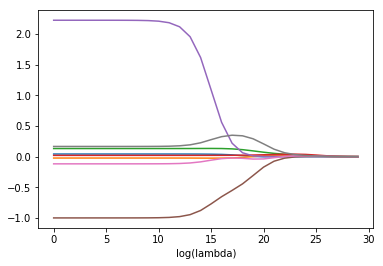

the best model from Ridge Regression is:
 [[  0.0662818   -2.16040657  14.80838471  10.57654272   9.63189893
  -20.59981927 -10.00037865   7.99808439]]
with constant term:  2.862909551269757


In [85]:
regression3()

上图绘制除了回归系数与 log(λ) 的关系。在最左边，即 λ 最小时，可以得到所有系数的原始值（与线性回归一致）；而在右边，系数全部缩减为0；在中间部分的某值将可以取得最好的预测效果。为了定量地找到最佳参数值，还需要进行交叉验证。另外，要判断哪些变量对结果预测最具有影响力，在上图中观察它们对应的系数大小就可以了。

## lasso

在增加如下约束时，普通的最小二乘法回归会得到与岭回归一样的公式:
$$
\sum_{k=1}^{n} w_k ^2 \leq \lambda
$$

上式限定了所有回归系数的平方和不能大于 λ 。使用普通的最小二乘法回归在当两个或更多的特征相关时，可能会得到一个很大的正系数和一个很大的负系数。正式因为上述限制条件的存在，使用岭回归可以避免这个问题。

与岭回归类似，另一个缩减方法lasso也对回归系数做了限定，对应的约束条件如下:
$$
\sum_{k=1}^{n} |w_k| \leq \lambda
$$
唯一的不同点在于，这个约束条件使用绝对值取代了平方和。虽然约束形式只是稍作变化，结果却大相径庭: 在 λ 足够小的时候，一些系数会因此被迫缩减到 0.这个特性可以帮助我们更好地理解数据。


## 前向逐步回归

前向逐步回归算法可以得到与 lasso 差不多的效果，但更加简单。它属于一种贪心算法，即每一步都尽可能减少误差。一开始，所有权重都设置为 1，然后每一步所做的决策是对某个权重增加或减少一个很小的值。

伪代码如下:
```
数据标准化，使其分布满足 0 均值 和单位方差
在每轮迭代过程中: 
    设置当前最小误差 lowestError 为正无穷
    对每个特征:
        增大或缩小:
            改变一个系数得到一个新的 w
            计算新 w 下的误差
            如果误差 Error 小于当前最小误差 lowestError: 设置 Wbest 等于当前的 W
        将 W 设置为新的 Wbest
```      


### 代码

In [86]:
#逐步线性回归算法
# eps为每次迭代需要调整的步长，numIt为迭代次数
def stageWise(xArr,yArr,eps=0.01,numIt=100):
    xMat=mat(xArr);yMat=mat(yArr).T
    # 标准化处理
    yMean=mean(yMat,0)
    yMat=yMat-yMean
    xMat=regularize(xMat)
    m,n=shape(xMat)
    returnMat=zeros((numIt,n))
    ws=zeros((n,1));wsTest=ws.copy();wsMax=ws.copy()
    # 每一次迭代
    for i in range(numIt):
        # 打印出这次的系数
        print(ws.T)
        lowestError=inf
        # 对每一个特征
        for j in range(n):
            for sign in [-1,1]:
                wsTest=ws.copy()
                wsTest[j]+=eps*sign
                yTest=xMat*wsTest
                rssE=rssError(yMat.A,yTest.A)
                if(rssE<lowestError):
                    lowestError=rssE
                    wsMax=wsTest
        ws=wsMax.copy()
        returnMat[i,:]=ws.T
    return returnMat



#test for stageWise
def regression4():
    xArr,yArr=loadDataSet("./input&code/Ch08/abalone.txt")
    stageWise(xArr,yArr,0.01,200)
    xMat = mat(xArr)
    yMat = mat(yArr).T
    xMat = regularize(xMat)
    yM = mean(yMat,0)
    yMat = yMat - yM
    weights = standRegress(xMat, yMat.T)
    print (weights.T)
    
def rssError(yArr,yHatArr):  
    return((yArr-yHatArr)**2).sum()  

def regularize(xMat):  
    inMat=xMat.copy()  
    inMeans=mean(inMat,0)   
    inVar=var(inMat,0)
    inMat=(inMat-inMeans)/inVar  
    return inMat

In [87]:
regression4()

[[0. 0. 0. 0. 0. 0. 0. 0.]]
[[0.   0.   0.   0.01 0.   0.   0.   0.  ]]
[[0.   0.   0.   0.02 0.   0.   0.   0.  ]]
[[0.   0.   0.   0.03 0.   0.   0.   0.  ]]
[[0.   0.   0.   0.04 0.   0.   0.   0.  ]]
[[0.   0.   0.   0.05 0.   0.   0.   0.  ]]
[[0.   0.   0.   0.06 0.   0.   0.   0.  ]]
[[0.   0.   0.01 0.06 0.   0.   0.   0.  ]]
[[0.   0.   0.01 0.06 0.   0.   0.   0.01]]
[[0.   0.   0.01 0.06 0.   0.   0.   0.02]]
[[0.   0.   0.01 0.06 0.   0.   0.   0.03]]
[[0.   0.   0.01 0.06 0.   0.   0.   0.04]]
[[0.   0.   0.01 0.06 0.   0.   0.   0.05]]
[[0.   0.   0.01 0.06 0.   0.   0.   0.06]]
[[0.   0.   0.01 0.06 0.   0.   0.   0.07]]
[[0.   0.   0.01 0.06 0.   0.   0.   0.08]]
[[0.   0.   0.01 0.05 0.   0.   0.   0.08]]
[[0.   0.   0.01 0.05 0.   0.   0.   0.09]]
[[0.   0.   0.01 0.05 0.   0.   0.   0.1 ]]
[[0.   0.   0.01 0.05 0.   0.   0.   0.11]]
[[ 0.    0.    0.01  0.05  0.   -0.01  0.    0.11]]
[[ 0.    0.    0.01  0.05  0.   -0.02  0.    0.11]]
[[ 0.    0.    0.01  0.05  0.   

[[ 0.04  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.05  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.04  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.05  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.04  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.05  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.04  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.05  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.04  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.05  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.04  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.05  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.04  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.05  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.04  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.05  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.04  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.05  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.04  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.05  0. 

![](./image/第8章回归/6.jpg)

逐步线性回归算法的主要优点在于它可以帮助人们理解现有的模型并作出改进。当构建了一个模型后，可以运行该算法找出重要的特征，这样就有可能及时停止对那些不重要特征的手机。最后，如果用于测试，该算法每100次迭代后就可以构建出一个模型，可以使用类似于10折交叉验证的方法比较这些模型，最终选择使误差最小的模型。

### 小结
当应用缩减方法（如逐步线性回归或岭回归）时，模型也就增加了偏差（bias），与此同时却减小了模型的方差。


## 权衡偏差和方差
任何时候，一旦发现模型和测量值之间存在差异，就说出现了误差。当考虑模型中的 “噪声” 或者说误差时，必须考虑其来源。你可能会对复杂的过程进行简化，这将导致在模型和测量值之间出现 “噪声” 或误差，若无法理解数据的真实生成过程，也会导致差异的产生。另外，测量过程本身也可能产生 “噪声” 或者问题。下面我们举一个例子，我们使用 线性回归 和 局部加权线性回归 处理过一个从文件导入的二维数据。

$$
y=3.0+1.7x+0.1\sin (30x)+0.06N(0,1)
$$

其中的 N(0, 1) 是一个均值为 0、方差为 1 的正态分布。我们尝试过禁用一条直线来拟合上述数据。不难想到，直线所能得到的最佳拟合应该是 3.0+1.7x 这一部分。这样的话，误差部分就是 0.1sin(30x)+0.06N(0, 1) 。在上面，我们使用了局部加权线性回归来试图捕捉数据背后的结构。该结构拟合起来有一定的难度，因此我们测试了多组不同的局部权重来找到具有最小测试误差的解。

下图给出了训练误差和测试误差的曲线图，上面的曲面就是测试误差，下面的曲线是训练误差。我们根据 预测鲍鱼年龄 的实验知道: 如果降低核的大小，那么训练误差将变小。从下图开看，从左到右就表示了核逐渐减小的过程。

![](./image/第8章回归/7.jpg)

一般认为，上述两种误差由三个部分组成: 偏差、测量误差和随机噪声。局部加权线性回归 和 预测鲍鱼年龄 中，我们通过引入了三个越来越小的核来不断增大模型的方差。

在缩减系数来“理解”数据这一节中，我们介绍了缩减法，可以将一些系数缩减成很小的值或直接缩减为 0 ，这是一个增大模型偏差的例子。通过把一些特征的回归系数缩减到 0 ，同时也就减小了模型的复杂度。例子中有 8 个特征，消除其中两个后不仅使模型更易理解，同时还降低了预测误差。对照上图，左侧是参数缩减过于严厉的结果，而右侧是无缩减的效果。

方差是可以度量的。如果从鲍鱼数据中取一个随机样本集（例如取其中 100 个数据）并用线性模型拟合，将会得到一组回归系数。同理，再取出另一组随机样本集并拟合，将会得到另一组回归系数。这些系数间的差异大小也就是模型方差的反映。


### 项目案例1: 预测乐高玩具套装的价格
**项目概述**
Dangler 喜欢为乐高套装估价，我们用回归技术来帮助他建立一个预测模型。

开发流程
>(1) 收集数据：用 Google Shopping 的API收集数据。
(2) 准备数据：从返回的JSON数据中抽取价格。
(3) 分析数据：可视化并观察数据。
(4) 训练算法：构建不同的模型，采用逐步线性回归和直接的线性回归模型。
(5) 测试算法：使用交叉验证来测试不同的模型，分析哪个效果最好。
(6) 使用算法：这次练习的目标就是生成数据模型。

>收集数据: 使用 Google 购物的 API

由于 Google 提供的 api 失效，我们只能自己下载咯，将数据存储在了 input 文件夹下的 setHtml 文件夹下

>准备数据: 从返回的 JSON 数据中抽取价格

因为我们这里不是在线的，就不再是 JSON 了，我们直接解析线下的网页，得到我们想要的数据。

>分析数据: 可视化并观察数据

这里我们将解析得到的数据打印出来，然后观察数据。

>训练算法: 构建不同的模型

In [94]:
from numpy import *
from bs4 import BeautifulSoup

# 从页面读取数据，生成retX和retY列表
def scrapePage(retX, retY, inFile, yr, numPce, origPrc):

    # 打开并读取HTML文件
    fr = open(inFile,encoding='gb18030', errors='ignore')
    soup = BeautifulSoup(fr.read(),"lxml")
    i=1

    # 根据HTML页面结构进行解析
    currentRow = soup.findAll('table', r="%d" % i)
    while(len(currentRow)!=0):
        currentRow = soup.findAll('table', r="%d" % i)
        title = currentRow[0].findAll('a')[1].text
        lwrTitle = title.lower()

        # 查找是否有全新标签
        if (lwrTitle.find('new') > -1) or (lwrTitle.find('nisb') > -1):
            newFlag = 1.0
        else:
            newFlag = 0.0

        # 查找是否已经标志出售，我们只收集已出售的数据
        soldUnicde = currentRow[0].findAll('td')[3].findAll('span')
        if len(soldUnicde)==0:
            print("item #%d did not sell" % i)
        else:
            # 解析页面获取当前价格
            soldPrice = currentRow[0].findAll('td')[4]
            priceStr = soldPrice.text
            priceStr = priceStr.replace('$','') #strips out $
            priceStr = priceStr.replace(',','') #strips out ,
            if len(soldPrice)>1:
                priceStr = priceStr.replace('Free shipping', '')
            sellingPrice = float(priceStr)

            # 去掉不完整的套装价格
            if  sellingPrice > origPrc * 0.5:
                    print("%d\t%d\t%d\t%f\t%f" % (yr,numPce,newFlag,origPrc, sellingPrice))
                    retX.append([yr, numPce, newFlag, origPrc])
                    retY.append(sellingPrice)
        i += 1
        currentRow = soup.findAll('table', r="%d" % i)

# 依次读取六种乐高套装的数据，并生成数据矩阵        
def setDataCollect(retX, retY):
    scrapePage(retX, retY, './input&code/Ch08/setHtml/lego8288.html', 2006, 800, 49.99)
    scrapePage(retX, retY, './input&code/Ch08/setHtml/lego10030.html', 2002, 3096, 269.99)
    scrapePage(retX, retY, './input&code/Ch08/setHtml/lego10179.html', 2007, 5195, 499.99)
    scrapePage(retX, retY, './input&code/Ch08/setHtml/lego10181.html', 2007, 3428, 199.99)
    scrapePage(retX, retY, './input&code/Ch08/setHtml/lego10189.html', 2008, 5922, 299.99)
    scrapePage(retX, retY, './input&code/Ch08/setHtml/lego10196.html', 2009, 3263, 249.99)

>测试算法：使用交叉验证来测试不同的模型，分析哪个效果最好

In [95]:
# predict for lego's price
def regression5():
    lgX = []
    lgY = []

    setDataCollect(lgX, lgY)
    crossValidation(lgX, lgY, 10)

In [96]:
regression5()

2006	800	0	49.990000	85.000000
2006	800	0	49.990000	102.500000
2006	800	0	49.990000	77.000000
item #4 did not sell
2006	800	0	49.990000	162.500000
2002	3096	0	269.990000	699.990000
2002	3096	0	269.990000	602.000000
2002	3096	0	269.990000	515.000000
2002	3096	0	269.990000	510.000000
2002	3096	0	269.990000	375.000000
2002	3096	1	269.990000	1050.000000
2002	3096	0	269.990000	740.000000
2002	3096	1	269.990000	759.000000
2002	3096	0	269.990000	730.000000
2002	3096	1	269.990000	750.000000
item #11 did not sell
2007	5195	0	499.990000	910.000000
2007	5195	1	499.990000	1199.990000
2007	5195	0	499.990000	811.880000
item #4 did not sell
2007	5195	0	499.990000	1324.790000
2007	5195	1	499.990000	850.000000
2007	5195	1	499.990000	800.000000
2007	5195	0	499.990000	810.000000
2007	5195	1	499.990000	1075.000000
2007	5195	0	499.990000	1050.000000
2007	5195	1	499.990000	1199.990000
2007	5195	0	499.990000	1342.310000
2007	5195	1	499.990000	1000.000000
2007	5195	0	499.990000	1780.000000
2007	5195	0	499.990